In [15]:
library(pdftools)
readpage <- pdf_convert('C:\\Users\\saumy\\Desktop\\Data Mining_R\\kingdom.pdf',
                       pages=c(19:32, 35:38))
text<- tesseract::ocr(readpage)

Converting page 19 to kingdom_19.png... done!
Converting page 20 to kingdom_20.png... done!
Converting page 21 to kingdom_21.png... done!
Converting page 22 to kingdom_22.png... done!
Converting page 23 to kingdom_23.png... done!
Converting page 24 to kingdom_24.png... done!
Converting page 25 to kingdom_25.png... done!
Converting page 26 to kingdom_26.png... done!
Converting page 27 to kingdom_27.png... done!
Converting page 28 to kingdom_28.png... done!
Converting page 29 to kingdom_29.png... done!
Converting page 30 to kingdom_30.png... done!
Converting page 31 to kingdom_31.png... done!
Converting page 32 to kingdom_32.png... done!
Converting page 35 to kingdom_35.png... done!
Converting page 36 to kingdom_36.png... done!
Converting page 37 to kingdom_37.png... done!
Converting page 38 to kingdom_38.png... done!


In [33]:
#If text isn't already embedded in the PDF, 
##then need to use OCR to extract the text. Tesseract is an excellent open-source engine for OCR
#Optical Character Recognition (OCR). OCR is a machine-learning technique used to transform images that contain text (e.g. a scan of a document) into actual text content.
install.packages("tm")
library("tm") #textmining package ;tm
install.packages("SnowballC")
library("SnowballC")
install.packages("wordcloud")
library("wordcloud")
install.packages("RColorBrewer")
library("RColorBrewer")
install.packages("tidytext")
library(tidytext)
install.packages("dplyr")
library(dplyr)
install.packages("stringr")
library(stringr) #all stringr functions under this package starts from str_..(str_replace_all,str_c, str_length etc)

Installing package into 'C:/Users/saumy/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'tm' is in use and will not be installed"Installing package into 'C:/Users/saumy/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'SnowballC' is in use and will not be installed"Installing package into 'C:/Users/saumy/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'wordcloud' is in use and will not be installed"Installing package into 'C:/Users/saumy/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'RColorBrewer' is in use and will not be installed"Installing package into 'C:/Users/saumy/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'tidytext' is in use and will not be installed"Installing package into 'C:/Users/saumy/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'dplyr' is in use and will not be insta

In [34]:
# We want to get rid of the ampersand signs &, as well as other punctuation marks. This can be
# done with str replace all() and replacing the pattern [[:punct:]] with empty strings " " ,with stringr package
textnew <- str_replace_all(text, "[[:punct:]]", " ")
textnew <-str_replace_all(textnew, "[^[:alnum:]]", " ") #Alphanumeric characters


In [35]:
var <- Corpus(VectorSource(textnew))
#TEXT TRANSFORMATION
# Convert the text to lower case 
var <- tm_map(var, content_transformer(tolower))
# Remove numbers
var <- tm_map(var, removeNumbers)
# Remove english common stopwords
var <- tm_map(var, removeWords, stopwords("english"))

Warning message in tm_map.SimpleCorpus(var, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeWords, stopwords("english")):
"transformation drops documents"

In [36]:
# Remove own stop word
# by specifying own stopwords as a character vector
#removeWords takes 2 arguments: the text object to which it's being applied and the list of words to remove.
#c() function allows to add new words to the stop words list.
var <- tm_map(var, removeWords,c("contrast","others","ends","white","light", 
                                 "beings","report","following","finale","but","catch","forecasts",
                                 "smallest","lead","nowhere","simply","impossible","permitted","forget","befoul","only", 
                                 "handwritten","holds","original","rights","reserved","beings","light","rubbish",
                                 "children","embedded","reason","comes","details","mentioned","only","man",
                                 "last","indicia","absolute","full","causal","best","minds","make",
                                 "things","worse","fairly","education","hat","hot","potato","dropped",
                                 "mentioned","above","already","spurious","auxiliary","crutch","subject",
                                 "misconduct","linguistic","physical","sense","suitable","location","innermost",
                                 "article","theorem","hyperlink","ineffable","negating","present",
                                 "pull","curtain","affected","no","questions","unanswered",
                                 "newest","flat","round","majority","auxiliary","crutch","term",
                                 "shift","hyperlink","planck","negative","side","length",
                                 "valid","solution","united","hundred","percent","fact","incomprehensible",
                                 "issue","done","after","pages","babble","closes","central",
                                 "word","attracts","long","term","no","describes","ceres",
                                 "conclusion","das","der","ein","equal","ghastlier","heritage","horrific","kénigreich",
                                 "mil","prediction","rumors","spaces","speculation","tausend","beginning","strangers","acl",
                                 "artnet","bamcne","bankruptcy","bicone","car","competition","due","ese","ety",
                                 "fee","lead","nowhere","simply","impossible","permitted","forget","befoul","only",
                                 "smallest","intentionally","nowhere","behind","stove","Progressive","long","stove","demimonde",
                                 "bolder","move","ridiculous","comparison","opposite","great","theory","again","wrong",
                                 "physicists","foundation","close","core","increases","language","addition","covered","eemits",
                                 "eerx","food","life","roba","trymoo","autism","indi","question","short",
                                 "principle","hand","lack","sufficient","trivy","water","called","expect","form","pak","prime","similar",
                                 "president","ruba","lack","ultimately","paking","head","westarp","home","means","continues","vex","front",
                                 "local","direction","tunnel","read","school","takes","quickly","single","real","entire","vex","front","even",
                                 "one","can","will","now","like","also","first","like","two","however","just","come","self","back","new","different")) 
#no need to put all 1 frequency words in stop words list, you can just filter out top 20-30 later.
##just observe final table output and remove (include in stop_words) that has no context/meaning;even if they are high frequency.

Warning message in tm_map.SimpleCorpus(var, removeWords, c("contrast", "others", :
"transformation drops documents"

In [37]:
# Remove punctuations
var <- tm_map(var, removePunctuation)
# Eliminate extra white spaces
var <- tm_map(var, stripWhitespace)

Warning message in tm_map.SimpleCorpus(var, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, stripWhitespace):
"transformation drops documents"

In [ ]:
##Building a term-document matrix:
###Document matrix is a table containing the frequency of the words. Column names are words and row names are documents. 
###The function TermDocumentMatrix() from text mining package can be used as follow :
dtm <- TermDocumentMatrix(var)
matrix <- as.matrix(dtm)
sorted_sum <- sort(rowSums(matrix),decreasing=TRUE)
table <- data.frame(Word = names(sorted_sum ),WordFrequency=sorted_sum)
table <- table %>% anti_join(stop_words)
table
top40_words <- head(table,40)
top40_words

In [ ]:
library(ggplot2)
ggplot(top40_words, aes(x= reorder(Word, -WordFrequency), y = WordFrequency)) +
  geom_bar(stat = "identity")+ 
  theme(axis.text.x=element_text(angle=45, hjust=1))
table$Word
table$WordFrequency

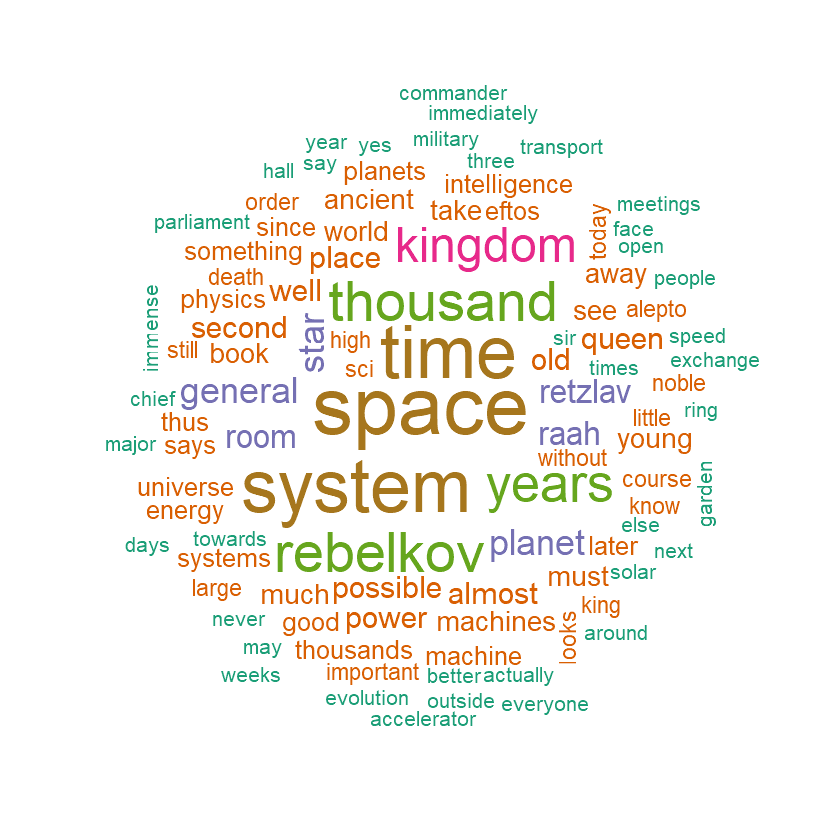

In [43]:
#Generate the Word cloud
set.seed(1234)
wordcloud(words = table$Word, freq = table$WordFrequency, min.freq = 4,
          max.words=100, random.order=FALSE,
          colors=brewer.pal(7, "Dark2"))